In [4]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
#初始化参数
input_layer_size=400
num_labels=10

In [3]:
mat_data=sio.loadmat('.\machine-learning-exercise-master\coursera-machine-learning-python\ex3\ex3data1.mat')
X=mat_data['X']
y=mat_data['y'].ravel()
m,n=X.shape

In [21]:
#展示图片函数
def display_data(X, tile_width=-1, padding=0):
    m, n = X.shape
    if tile_width < 0:
        tile_width = int(np.round(np.sqrt(n)))
    tile_height = n / tile_width
    display_rows = int(np.floor(np.sqrt(m)))
    display_columns = int(np.ceil(m / display_rows))
    tile_height_padded = tile_height + padding * 2
    tile_width_padded = tile_width + padding * 2
    data = np.zeros((int(display_rows * tile_height_padded), int(display_columns * tile_width_padded)))
    for i in range(display_rows):
        for j in range(display_columns):
            tile = format_tile(X[i * int(display_rows) + j,], int(tile_width), padding)
            tile = tile.T
            data[int(i * tile_height_padded):int((i + 1) * tile_height_padded),
                 int(j * tile_width_padded):int((j + 1) * tile_width_padded)] = tile
    plt.imshow(data, cmap='gray', extent=[0, 1, 0, 1])
def format_tile(x, width=-1, padding=0):
    if width < 0:
        width = int(np.round(np.sqrt(len(x))))
    height = len(x) / width
    tile = np.ones((int(height) + int(padding) * 2, int(width) + int(padding) * 2))
    for i in range(int(padding), int(height) + int(padding)):
        tile[i, padding:(padding + width)] = x[((i - padding) * width):((i - padding) * width + width)]
    return tile

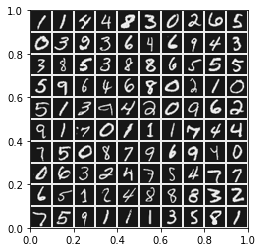

In [22]:
#展示图片
rand_indices=np.random.permutation(m)
sel=X[rand_indices[0:100],:]
plt.figure()
display_data(sel,padding=1)
plt.show()

In [46]:
def lr_cost_function(theta, X, y, l):
    m, n = X.shape
    mask = np.eye(len(theta))
    mask[0, 0] = 0
    X_dot_theta = X.dot(theta)
    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(X_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(X_dot_theta)))) + l / (2.0 * m) * np.sum(np.square(mask.dot(theta)))
    grad=1.0/m*(sigmoid(X_dot_theta)-y).T.dot(X).T + 1.0*l/m*(mask.dot(theta))
    return J,grad

In [47]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [48]:

theta_t=np.array([-2,-1,1,2])
X_t=np.hstack((np.ones((5,1)),np.arange(1,16).reshape(5,3,order='F')/10.0))
y_t=np.array([1,0,1,0,1])
lambda_t=3
cost,grad=lr_cost_function(theta_t,X_t,y_t,lambda_t)
print(cost)
print(grad)

2.534819396109744
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [49]:
#训练OneVSall模型
import scipy.optimize as opt 
def one_vs_all(X,y,num_labels,l):
    m,n=X.shape
    all_theta=np.zeros((num_labels,n+1))
    X=np.hstack((np.ones((m,1)),X))
    initial_theta=np.zeros(n+1)
    for i in range(0,10):
        label=10 if i==0 else i
        result=opt.minimize(fun=lr_cost_function,x0=initial_theta,args=(X,(y==label).astype(int),l),method='TNC',jac=True)
        print('one_vs_all():lable=',label,'success=',result.success)
        all_theta[i,:]=result.x
    return all_theta

In [50]:
l=0.1
all_theta=one_vs_all(X,y,num_labels,l)

one_vs_all():lable= 10 success= True
one_vs_all():lable= 1 success= True
one_vs_all():lable= 2 success= True
one_vs_all():lable= 3 success= True
one_vs_all():lable= 4 success= True
one_vs_all():lable= 5 success= True
one_vs_all():lable= 6 success= True
one_vs_all():lable= 7 success= True
one_vs_all():lable= 8 success= True
one_vs_all():lable= 9 success= True


In [51]:
#预测one_VS_all模型
def predict_one_vs_all(all_theta,X):
    m,n=X.shape
    X=np.hstack((np.ones((m,1)),X))
    p=np.argmax(X.dot(all_theta.T),axis=1)
    p[p==0]=10
    return p

In [52]:
pred=predict_one_vs_all(all_theta,X)
print('Train set accuracy:',np.mean(pred==y)*100)

Train set accuracy: 96.46000000000001
